# <center>第二次作业 线性回归 Linear Regression

In [2]:
import matplotlib.pyplot as plt 
import numpy as np
import numpy.matlib
import math
from numpy import *

## 1.生成训练集

In [3]:
#m=40个样本点
x_train=[]
y_train=[]
for q in range(1,41,1):
    x_train.append(q/40)                                              
    y_train.append(math.sin(6*q/40)+0.01*float(numpy.matlib.randn(1)))

## 2.探索最佳n
这里回顾上次作业关于学习率的选取，选择a=0.0045这个学习率，逼近较快

Text(0, 0.5, '$cost_function$')

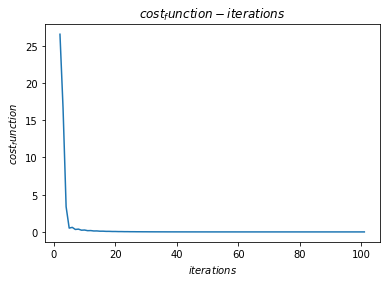

In [4]:
import matplotlib.pyplot as plt 
import numpy as np
from scipy import stats
%matplotlib inline
import math
def L(x):
    Lx=0.5*(x**4.0-9.0)**2.0   
    return Lx
def f(t):   
    ft=4*(pow(t,4)-9)*x**3    
    return ft
p=1.7321   #9的4次方根近似值
a=0.0045       
x=1
iterations=[]
cost_function=[]
i=1
value=0
while abs(x-p)>0.0001 :
    x=x-a*f(x)
    i=i+1
    iterations.append(i)      
    value=L(x)
    cost_function.append(value)        
plt.plot(iterations,cost_function)   
plt.title('$cost_function-iterations$')
plt.xlabel("$iterations$")
plt.ylabel("$cost_function$")

##### 我们可以发现，在n=10处会有一个较佳的结果，故我们在后续探究中，使用n=10

## 3.用梯度下降算法的矩阵形式来求theta(赋予初值0）

In [5]:
n=10
x_train_list=[]
for i in range(0,40,1):
    x_train_row=[]
    x_train_tem=0
    for j in range(0,11,1):
        x_train_tem=pow(x_train[i],j)
        x_train_row.append(x_train_tem)
    x_train_list.append(x_train_row) 
x_train_mat=np.matrix(x_train_list)

In [6]:
x_train_mat=np.matrix(x_train_list)
y_train_mat=np.matrix(y_train)
y_train_mat=y_train_mat.transpose()
x_train_mat_transpose=x_train_mat
x_train_mat_transpose=x_train_mat.transpose() #做出x,xt,y ma

In [7]:
m=40
theta_1 = numpy.matlib.zeros((11,1))
iterations=0
while(iterations<11):
    iterations+=1
    theta_1=theta_1-np.dot((0.0045/m)*x_train_mat_transpose,(np.dot(x_train_mat,theta_1)-y_train_mat))

In [8]:
theta_2=np.dot(np.dot((np.linalg.inv(np.dot(x_train_mat_transpose,x_train_mat))),x_train_mat_transpose),y_train_mat)

In [10]:
np.transpose(theta_1-theta_2)

matrix([[ 6.04245232e-03, -6.92885540e+00,  2.65043686e+01,
         -2.86544033e+02,  2.02959929e+03, -7.40816540e+03,
          1.61655038e+04, -2.19875727e+04,  1.82038518e+04,
         -8.38007937e+03,  1.64405658e+03]])

### 我们发现theta1和theta2不一样
## 4.接下来用测试集进行测试

In [11]:
#m=20个样本点
x_test=[]
y_test=[]
for q in range(1,21,1):
    x_test.append(q/20)                                              
    y_test.append(math.sin(6*q/20)+0.01*float(numpy.matlib.randn(1)))

In [12]:
n=10
x_test_list=[]
for i in range(0,20,1):
    x_test_row=[]
    x_test_tem=0
    for j in range(0,11,1):
        x_test_tem=pow(x_test[i],j)
        x_test_row.append(x_test_tem)
    x_test_list.append(x_test_row)      

In [13]:
x_test_mat=np.matrix(x_test_list)
y_test_mat=np.matrix(y_test)
y_test_mat=y_test_mat.transpose()
x_test_mat_transpose=x_test_mat
x_test_mat_transpose=x_test_mat.transpose()

In [14]:
Htheta_1=np.dot(x_test_mat,theta_1)
Htheta_1_y=Htheta_1-y_test_mat
Htheta_1_y_transpose=Htheta_1_y
Htheta_1_y_transpose=Htheta_1_y_transpose.transpose()
Jtheta_1=(1/(2*m))*float(np.dot(Htheta_1_y_transpose,Htheta_1_y))

In [15]:
Htheta_2=np.dot(x_test_mat,theta_2)
Htheta_2_y=Htheta_2-y_test_mat
Htheta_2_y_transpose=Htheta_2_y
Htheta_2_y_transpose=Htheta_2_y_transpose.transpose()
Jtheta_2=(1/(2*m))*float(np.dot(Htheta_2_y_transpose,Htheta_2_y))

In [16]:
HthetaX_2=np.dot(x_train_mat,theta_2)
HthetaX_2_y=HthetaX_2-y_train_mat
HthetaX_2_y_transpose=HthetaX_2_y
HthetaX_2_y_transpose=HthetaX_2_y_transpose.transpose()
JthetaX_2=(1/(2*m))*float(np.dot(HthetaX_2_y_transpose,HthetaX_2_y))

In [17]:
print('Jtheta_1 is: ',Jtheta_1,'Jtheta_2 is: ',Jtheta_2)

Jtheta_1 is:  0.12658883905874938 Jtheta_2 is:  3.4975223238552416e-05


### 我们可以发现，用第一种方法算出来的结果更优

## 5.我们选择以第二种求theta的方法来做j-n曲线

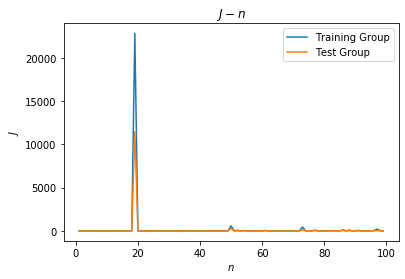

In [18]:
N_max=[]
JTR=[]
JTE=[]
for k in range(1,100,1):
    N_max.append(k)
    xJ_train_list=[]  
    for i in range(0,40,1):
        xJ_train_row=[]
        xJ_train_tem=0
        for j in range(0,k+1,1):
            xJ_train_tem=pow(x_train[i],j)
            xJ_train_row.append(xJ_train_tem)
        xJ_train_list.append(xJ_train_row)
    xJ_train_mat=np.matrix(xJ_train_list)
    yJ_train_mat=np.matrix(y_train)
    yJ_train_mat=yJ_train_mat.transpose()
    xJ_train_mat_transpose=xJ_train_mat
    xJ_train_mat_transpose=xJ_train_mat.transpose()
    thetaJ_2=np.dot(np.dot((np.linalg.inv(np.dot(xJ_train_mat_transpose,xJ_train_mat))),xJ_train_mat_transpose),yJ_train_mat)
    HthetaJTR_2=np.dot(xJ_train_mat,thetaJ_2)
    HthetaJTR_2_y=HthetaJTR_2-yJ_train_mat
    HthetaJTR_2_y_transpose=HthetaJTR_2_y
    HthetaJTR_2_y_transpose=HthetaJTR_2_y_transpose.transpose()
    JthetaJTR_2=(1/(2*40))*float(np.dot(HthetaJTR_2_y_transpose,HthetaJTR_2_y))
    JTR.append(JthetaJTR_2)
    xJ_test_list=[]
    for i in range(0,20,1):
        xJ_test_row=[]
        xJ_test_tem=0
        for j in range(0,k+1,1):
            xJ_test_tem=pow(x_test[i],j)
            xJ_test_row.append(xJ_test_tem)
        xJ_test_list.append(xJ_test_row)
    xJ_test_mat=np.matrix(xJ_test_list)
    yJ_test_mat=np.matrix(y_test)
    yJ_test_mat=yJ_test_mat.transpose()
    xJ_test_mat_transpose=xJ_test_mat
    xJ_test_mat_transpose=xJ_test_mat.transpose()
    HthetaJTE_2=np.dot(xJ_test_mat,thetaJ_2)
    HthetaJTE_2_y=HthetaJTE_2-yJ_test_mat
    HthetaJTE_2_y_transpose=HthetaJTE_2_y
    HthetaJTE_2_y_transpose=HthetaJTE_2_y_transpose.transpose()
    JthetaJTE_2=(1/(2*40))*float(np.dot(HthetaJTE_2_y_transpose,HthetaJTE_2_y))
    JTE.append(JthetaJTE_2)
plt.plot(N_max,JTR,N_max,JTE)
plt.title('$J-n$')
plt.xlabel("$n$")
plt.ylabel("$J$")
plt.legend(['Training Group','Test Group'])

#### 结果发现测试集和训练集的J-n曲线在大部分地方拟合，但是在线段的凸起处有区别，初步判断尖点是原函数不可导的间断点，总体而言，由训练集训练出的函数拟合效果较好。